In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data = pd.read_csv('data/keycountries.csv')
import scipy.optimize as opt

In [257]:
data.loc[data.Date == '2020-02-26',:]
data.loc[data.Date == '2020-03-16',:]

,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
54,2020-03-16,81033,4632,1551,27980,6683,7272,9942,14991


In [585]:
data.head()

,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,2020-01-22,1,1,0,1,0,0,0,0
1,2020-01-23,1,1,0,1,0,0,0,0
2,2020-01-24,920,2,0,1,2,0,0,0
3,2020-01-25,1,2,0,1,3,0,0,0
4,2020-01-26,2075,5,0,1,3,0,0,0


In [332]:
# https://countrymeters.info/en/China
# CHINA, US, UK, Italy, Fr, De, Spain, Iran
population = [1410258821, 333462740, 65788172, 65788172, 65788172, 81465862, 81465862, 83983803]
data_norm = data.iloc[:,1:].divide(population, axis=1)

# FRM-COVID-19 Hubbert Curve 
This notebook will provide early stage result of fitting Hubbert Curves to COVID-19 infection number data. We will follow the notation and equation from a unpublished paper "A Note on the Evolution of Covid-19 in Italy" for easy communication and a kick start of project. Link to paper https://arxiv.org/pdf/2003.08684.pdf

### The logistic function:
$$N(\tau)= N_0 \frac{e^{r\tau}}{1+\frac{N_0}{K}(e^{rt}-1)}$$


where:

$\tau$ is __time__

$r$ is the __growth rate__

$K$ is the carrying capacity; in this case the __maximum number of individuals__ which can be infected|


### The Hubbert Curve
The Hubeert curve is the first derivative of the logistic function with respect to time, we get

$$N'(\tau) = \frac{e^{r\tau}N_0(K-N_0)}{K\left(1+\frac{N_0}{K}(e^{r\tau}-1)\right)^2}$$



$$$$

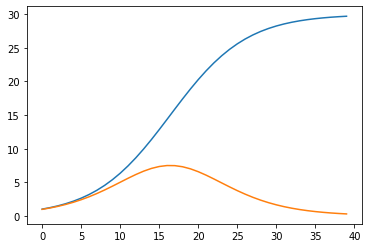

In [512]:
def logistic_function(t, N_0=1, K=30, r=0.2):
    N_t = N_0*np.exp(r*t)/(1+(N_0/K)*(np.exp(r*t)-1))
    return N_t

def hubbert_curve(t, N_0=1, K=30, r=0.2):
    nominator = np.exp(r*t)*N_0*(K-N_0)
    denominator = K*((1+(N_0/K)*(np.exp(r*t)-1))**2)
    return nominator/denominator

n = 40
x = np.linspace(0, n, n)
plt.plot(logistic_function(x), label='logistic function')
plt.plot(hubbert_curve(x), label='Hubbert curve')

In [514]:
# We can also combine two hubbert curves
def two_hubbert_curve(t, N_0_1=1, K_1=30, r_1=0.2, N_0_2=1, K_2=30, r_2=0.2):
    return hubbert_curve(t, N_0=N_0_1, K=K_1, r=r_1) + hubbert_curve(t, N_0=N_0_2, K=K_2, r=r_2)

Text(0.5, 1.0, 'China Daily Infections and two Hubbert Curves')

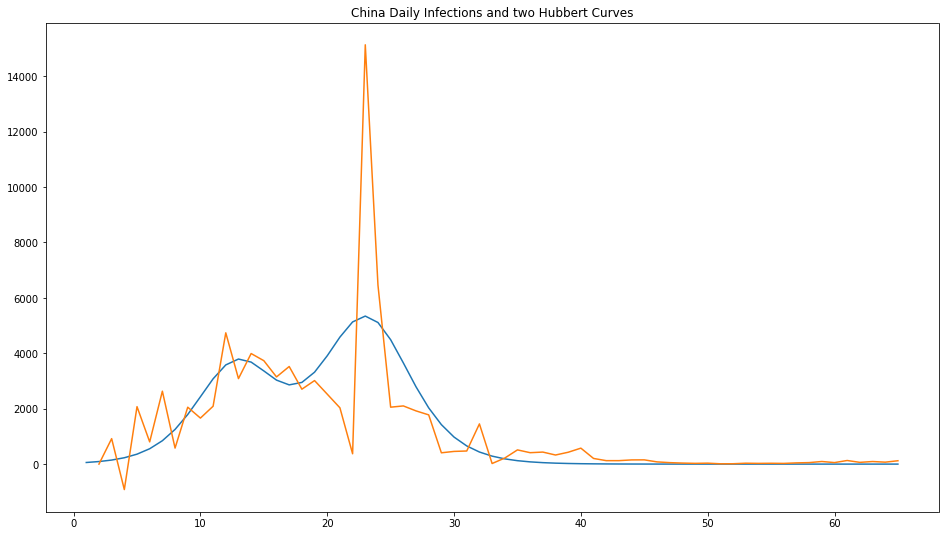

In [520]:
y = data.China
# y = data.Italy.iloc[35:55]
y.iloc[0]=1

x = np.arange(len(y))+1

(N_0_1, K_1, r_1, N_0_2, K_2, r_2), cov = opt.curve_fit(two_hubbert_curve, x[1:], y.diff()[1:], 
                                 bounds = ([1,0,0,1,0,0],[10000,100000000000,100000,10000,100000000000,100000]),
                                 p0 = (1,30,1, 1,30,1))
plt.figure(figsize=(16,9))
plt.plot(x,two_hubbert_curve(t=x, N_0_1=N_0_1, K_1=K_1, r_1=r_1, N_0_2=N_0_2, K_2=K_2, r_2=r_2))
plt.plot(x, y.diff())
plt.title("China Daily Infections and two Hubbert Curves")

Text(0.5, 1.0, 'China Cummulative Daily Infections and Logistic Function of Sum of two Hubbert Curves')

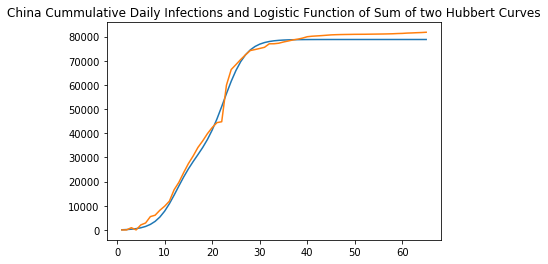

In [519]:
plt.figure(figsize=(16,9))
plt.plot(x, two_hubbert_curve(t=x, N_0_1=N_0_1, K_1=K_1, r_1=r_1, N_0_2=N_0_2, K_2=K_2, r_2=r_2).cumsum())
plt.plot(x, y)
plt.title("China Cummulative Daily Infections and Logistic Function of Sum of two Hubbert Curves")

In [581]:
y.diff()

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
59    6557.0
60    5560.0
61    4789.0
62    5249.0
63    5210.0
Name: Italy, Length: 64, dtype: float64

In [583]:
y = data.Italy.iloc[data.Italy.nonzero()[0][0]-1:data.Italy.nonzero()[0][-1]] 
# y = data.Italy.iloc[35:55]
y.iloc[0]=1

x = np.arange(len(y))+1

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


IndexError: single positional indexer is out-of-bounds

ValueError: x and y must have same first dimension, but have shapes (64,) and (0,)

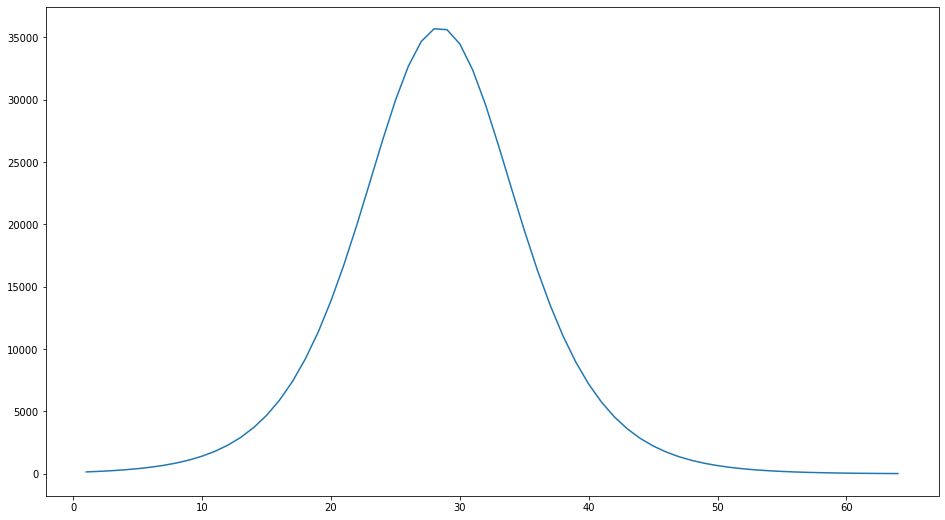

In [584]:
plt.figure(figsize=(16,9))
plt.plot(x,hubbert_curve(t=x-1, N_0=N_0, K=K, r=r), label = 'Hubbert Curve')
plt.plot(x, y.diff(), label = 'Daily Infections')
plt.title("Italy Daily Infections and its Hubbert Curves")
plt.legend()

print('Initial Number:',round(N_0,3), 
      '\nApproximated Total Infections:',round(K,3),
      '\nApproximated Growth Rate:', round(r,3))

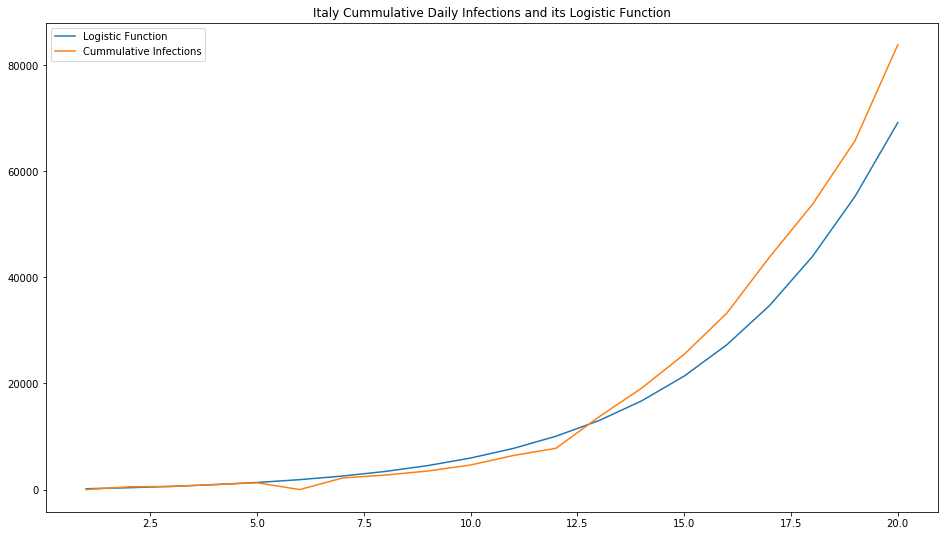

In [551]:
plt.figure(figsize=(16,9))
plt.title("Italy Cummulative Daily Infections and its Logistic Function")
plt.plot(x,hubbert_curve(t=x-1, N_0=N_0, K=K, r=r).cumsum(), label='Logistic Function')
plt.plot(x, y, label='Cummulative Infections')
plt.legend()

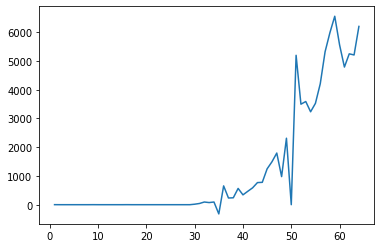

In [579]:
plt.plot(data.Italy.diff())

In [578]:
x_pred = np.linspace(0,60,60)
plt.figure(figsize=(16,9))
plt.plot(x_pred,hubbert_curve(t=x_pred, N_0=N_0, K=K, r=r), label = 'Hubbert Curve')
plt.plot(x, y.diff(), label = 'Daily Infections')
plt.title("Italy Daily Infections and its Hubbert Curves")
plt.legend()

plt.figure(figsize=(16,9))
plt.title("Italy Cummulative Daily Infections and its Logistic Function")
plt.plot(x_pred,hubbert_curve(t=x_pred, N_0=N_0, K=K, r=r).cumsum(), label='Logistic Function')
plt.plot(x, y, label='Cummulative Infections')
plt.legend()

SyntaxError: invalid syntax (<ipython-input-578-07f11c02d4e4>, line 4)

In [372]:
data

,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,2020-01-22,548,1,0,0,0,0,0,0
1,2020-01-23,1,1,0,0,0,0,0,0
2,2020-01-24,920,2,0,1,2,0,0,0
3,2020-01-25,1,2,0,1,3,0,0,0
4,2020-01-26,2075,5,0,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...
60,2020-03-22,81435,33276,5745,59138,16243,24873,28768,21638
61,2020-03-23,81498,43847,6726,63927,20123,29056,35136,23049
62,2020-03-24,81591,53740,8164,69176,22622,32986,39885,24811
63,2020-03-25,81661,65778,9640,74386,25600,37323,49515,27017


In [546]:
y = data.US.iloc[45:]
# y = data.Italy.iloc[35:55]
y.iloc[0]=1

x = np.arange(len(y))+1
x1 = np.arange(105)+1

N_0: 153.36797877132054 K: 143189.63479105645 r: 0.2492373957309194


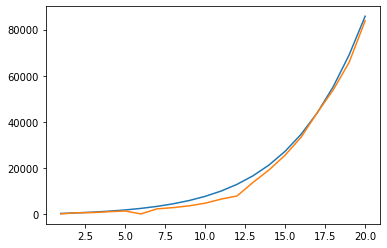

In [547]:
(N_0, K, r), cov = opt.curve_fit(hubbert_curve, x[1:],y.diff()[1:], 
                                 bounds = ([1,0,0],[10000,100000000000,100000]), p0 = (1,30,1))

print('N_0:',N_0, 'K:', K, 'r:', r)
plt.plot(x,hubbert_curve(t=x, N_0=N_0, K=K, r=r).cumsum())
plt.plot(x, y)


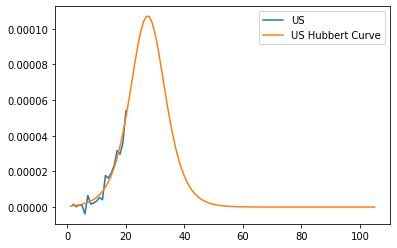

In [548]:
from functools import partial
plt.plot(x, y.diff()/population[1], label='US')



# Fit US curve with given N_0 and r
(N_0_us_italy, K_us_italy, r_us_italy), cov = opt.curve_fit(hubbert_curve, x[1:],y.diff()[1:], 
                                 bounds = ([N_0-0.0001,0,italy_par[2]-0.0001],[N_0,1000000000,italy_par[2]]),
                                          p0 = (N_0,10000,italy_par[2]))

# Fit US curve with given N_0 and r
(N_0_us_china, K_us_china, r_us_china), cov = opt.curve_fit(hubbert_curve, x[1:],y.diff()[1:], 
                                 bounds = ([N_0-0.0001,0,china_par[2]-0.0001],[N_0,1000000000,china_par[2]]),
                                          p0 = (N_0,10000,china_par[2]))

plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=K/population[1], r=r), label='US Hubbert Curve')
# plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=K_us_italy/population[3], r=italy_par[2]), label='Italian R')
# plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=K_us_china/population[0], r=china_par[2]), label='Chinese R')
plt.legend()

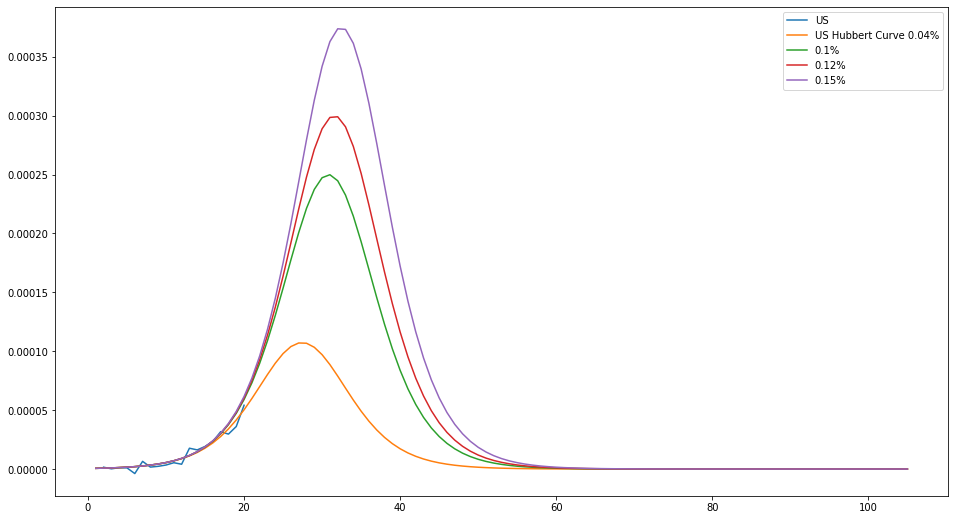

In [571]:
plt.figure(figsize=(16,9))

plt.plot(x, y.diff()/population[1], label='US')
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=K/population[1], r=r), label='US Hubbert Curve 0.04%')
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=0.001, r=r), label='0.1%')
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=0.0012, r=r), label='0.12%')
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=0.0015, r=r), label='0.15%')
plt.legend()

In [469]:
# Fit US curve with given N_0 and r
(N_0, K_us_italy, r), cov = opt.curve_fit(hubbert_curve, x[1:],y.diff()[1:], 
                                 bounds = ([N_0-0.0001,0,italy_par[2]-0.0001],[N_0,1000000000,italy_par[2]]),
                                          p0 = (N_0,10000,italy_par[2]))



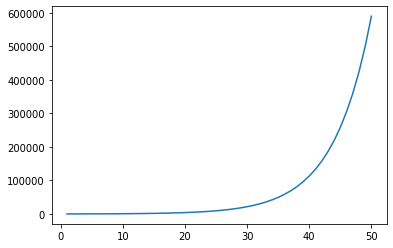

In [447]:
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0, K=K_us_italy, r=italy_par[2]), label='Chinese R')


In [501]:
italy_par[1]/population[3]

0.00033891166698927155

In [504]:
china_par[1]/population[0]*100

0.0012209762152930934

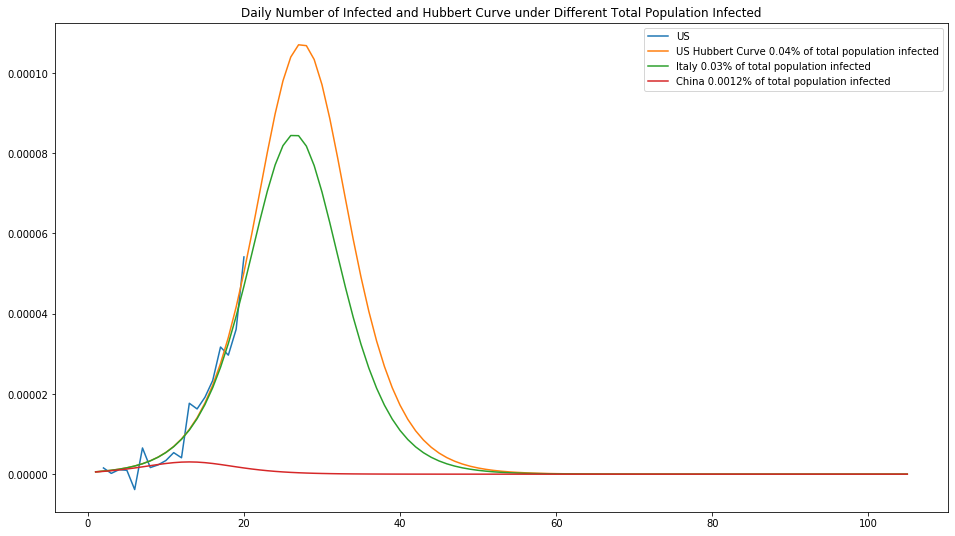

In [511]:
plt.figure(figsize=(16,9))
plt.plot(x, y.diff()/population[1], label='US')
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=K/population[1], r=r), label='US Hubbert Curve 0.04% of total population infected')
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=italy_par[1]/population[3], r=r), label='Italy 0.03% of total population infected')
plt.plot(x1,hubbert_curve(t=x1, N_0=N_0/population[1], K=china_par[1]/population[0], r=r), label='China 0.0012% of total population infected')
plt.title('Daily Number of Infected and Hubbert Curve under Different Total Population Infected')
plt.legend()